In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [2]:
filepath =r"Datasets/Dry_Bean_Dataset.xlsx - Dry_Beans_Dataset.csv"
dataset = pd.read_csv(filepath)

In [3]:
distrubation = dataset['Class'].value_counts()
print("Class Distrubation")
print(distrubation)

Class Distrubation
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [4]:
distrubation.shape

(7,)

In [5]:
distrubation.describe()

count       7.000000
mean     1944.428571
std       962.633170
min       522.000000
25%      1476.000000
50%      1928.000000
75%      2331.500000
max      3546.000000
Name: count, dtype: float64

In [6]:
distrubation.head()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
Name: count, dtype: int64

In [7]:
distrubation.tail()

Class
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

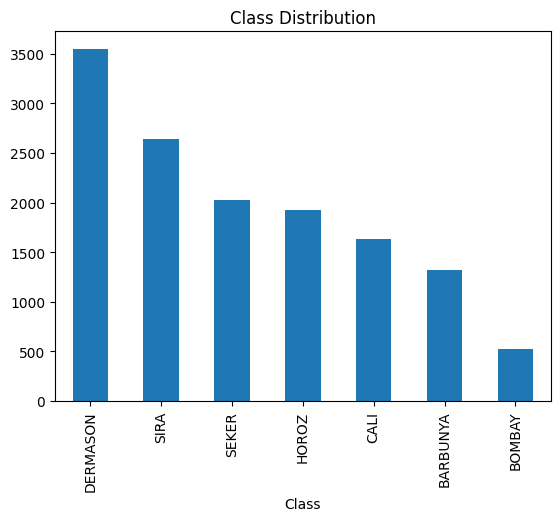

In [8]:
distrubation.plot(kind='bar', title='Class Distribution')
plt.show()

In [9]:
# Spliting and Training data
x = dataset.drop(columns=['Class'])
y = dataset['Class']

In [10]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=42)

In [11]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [12]:
num_classes = len(label_encoder.classes_)
model1= Sequential([
    Dense(64, activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes,activation='softmax')
])

C:\Users\sasid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
history = model1.fit(x_train,y_train_encoded,epochs=20,batch_size=32,validation_data=(x_val,y_val_encoded))
test_loss, test_accuracy = model1.evaluate(x_test,label_encoder.transform(y_test))
print("Test Accuracy:",test_accuracy)

Epoch 1/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1699 - loss: 1547.4169 - val_accuracy: 0.1415 - val_loss: 1.9351
Epoch 2/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1653 - loss: 1.9264 - val_accuracy: 0.2605 - val_loss: 1.9017
Epoch 3/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2543 - loss: 1.8958 - val_accuracy: 0.2605 - val_loss: 1.8756
Epoch 4/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2636 - loss: 1.8697 - val_accuracy: 0.2605 - val_loss: 1.8585
Epoch 5/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2594 - loss: 1.8582 - val_accuracy: 0.2605 - val_loss: 1.8485
Epoch 6/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2619 - loss: 1.8493 - val_accuracy: 0.2605 - val_loss: 1.8425
Epoch 7/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2568 - loss: 1.8410 - val_accuracy: 0.2605 - val_loss: 1.8393
Epoch 8/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2624 - loss: 1.8420 - val_accuracy: